In [27]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [31]:
pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [32]:
pip install dash-core-components dash-html-components

In [12]:
data=pd.read_csv('netflix.csv')
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
# Checking for missing values
missing = data.isnull().sum()
print("Missing Values:")
print(missing)


Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [15]:

data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)


In [17]:
# Convert date-related columns to datetime format
data['date_added'] = pd.to_datetime(data['date_added'])


In [18]:
# Remove any leading/trailing whitespaces in categorical columns
data['type'] = data['type'].str.strip()
data['country'] = data['country'].str.strip()
data['rating'] = data['rating'].str.strip()


In [19]:
# After Cleaning
print("Cleaned Dataset:")
print(data.head())


Cleaned Dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 S

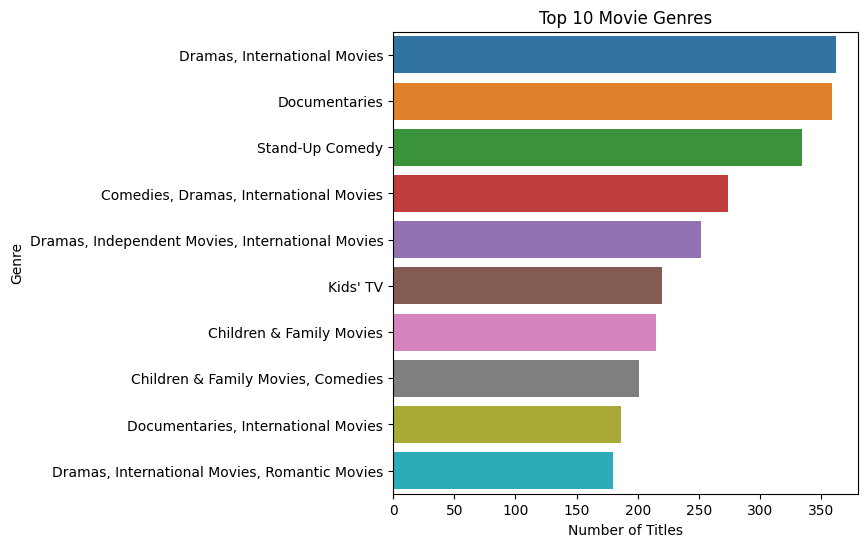

In [25]:

# Movie Genres barplot
plt.figure(figsize=(6, 6))
genre_counts = data['listed_in'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Top 10 Movie Genres')
plt.show()




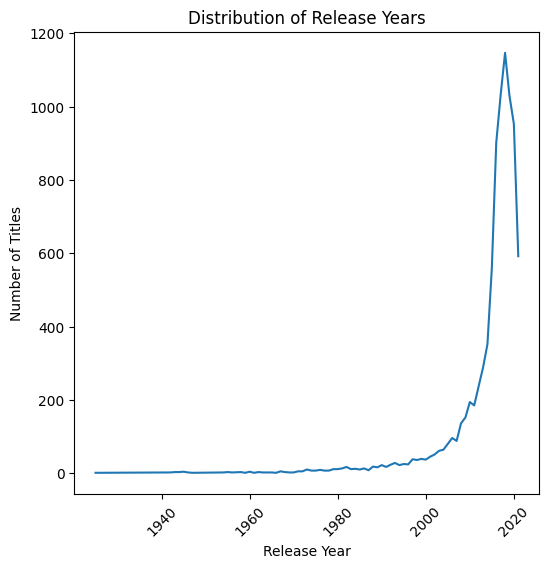

In [24]:
#Release Years lineplot
plt.figure(figsize=(6, 6))
release_year_counts = data['release_year'].value_counts().sort_index()
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Distribution of Release Years')
plt.xticks(rotation=45)
plt.show()


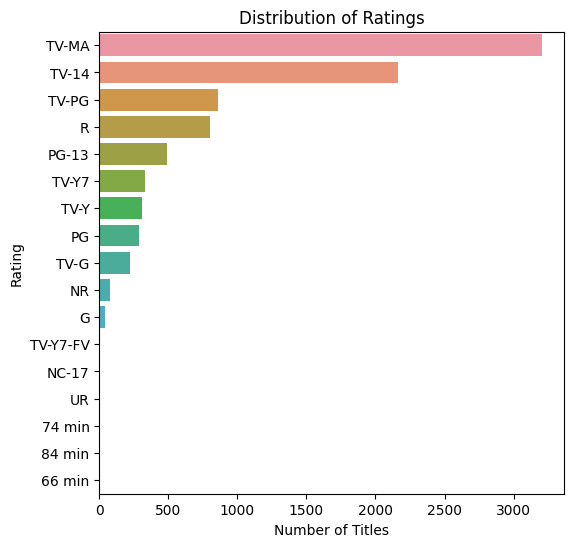

In [26]:
# Ratings barplot
plt.figure(figsize=(6, 6))
rating_counts = data['rating'].value_counts()
sns.barplot(x=rating_counts.values, y=rating_counts.index)
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.title('Distribution of Ratings')
plt.show()


In [28]:
#scatter plot
scatter_plot = px.scatter(data, x='release_year', y='duration', color='type', hover_data=['title'])
scatter_plot.update_layout(title='Release Year vs. Duration', xaxis_title='Release Year', yaxis_title='Duration')
scatter_plot.show()


In [29]:
#barchart
bar_chart = px.bar(data['country'].value_counts().head(10), orientation='h')
bar_chart.update_layout(title='Top 10 Countries with Most Titles', xaxis_title='Number of Titles', yaxis_title='Country')
bar_chart.show()


In [30]:
#pie chart
pie_chart = px.pie(data['rating'].value_counts(), names=data['rating'].value_counts().index)
pie_chart.update_layout(title='Distribution of Ratings')
pie_chart.show()

In [36]:
import dash
import dash_core_components as dcc
import dash_html_components as html

# Create a Dash application
app = dash.Dash(__name__)

# Define the style and layout of the application
app.layout = html.Div(
    style={'font-family': 'Arial, sans-serif', 'margin': '50px'},
    children=[
        html.H1(
            children="Netflix Movies and TV Shows",
            style={'text-align': 'center', 'font-size': '32px', 'margin-bottom': '40px'}
        ),
        html.Div(
            style={'display': 'flex', 'flex-wrap': 'wrap', 'justify-content': 'center'},
            children=[
                dcc.Graph(
                    id='scatter-plot',
                    figure=px.scatter(data, x='release_year', y='duration', color='type', hover_data=['title']),
                    style={'width': '48%', 'height': '400px', 'margin': '10px'}
                ),
                dcc.Graph(
                    id='bar-chart',
                    figure=px.bar(data['country'].value_counts().head(10), orientation='h'),
                    style={'width': '48%', 'height': '400px', 'margin': '10px'}
                ),
                dcc.Graph(
                    id='line-plot',
                    figure=px.line(data['release_year'].value_counts().sort_index()),
                    style={'width': '48%', 'height': '400px', 'margin': '10px'}
                ),
                dcc.Graph(
                    id='pie-chart',
                    figure=px.pie(data['rating'].value_counts()),
                    style={'width': '48%', 'height': '400px', 'margin': '10px'}
                )
            ]
        ),
        html.Div(
            style={'text-align': 'center', 'margin-top': '40px'},
            children=[
                html.Label(
                    "Filter by Type",
                    style={'font-size': '20px'}
                ),
                dcc.Dropdown(
                    id='type-dropdown',
                    options=[
                        {'label': 'Movie', 'value': 'Movie'},
                        {'label': 'TV Show', 'value': 'TV Show'}
                    ],
                    value='Movie',
                    style={'width': '200px', 'margin-top': '10px'}
                )
            ]
        )
    ]
)

# Add interactivity
@app.callback(
    Output(component_id='scatter-plot', component_property='figure'),
    Output(component_id='bar-chart', component_property='figure'),
    Input(component_id='type-dropdown', component_property='value')
)
def update_plots(selected_type):
    filtered_data = data[data['type'] == selected_type]

    scatter_plot = px.scatter(filtered_data, x='release_year', y='duration', color='type', hover_data=['title'])
    bar_chart = px.bar(filtered_data['country'].value_counts().head(10), orientation='h')

    scatter_plot.update_layout(title='Release Year vs. Duration', xaxis_title='Release Year', yaxis_title='Duration')
    bar_chart.update_layout(title='Top 10 Countries with Most Titles', xaxis_title='Number of Titles', yaxis_title='Country')

    return scatter_plot, bar_chart

# Run the application
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>